# Лабораторная работа №1
## ОСНОВНЫЕ СРЕДСТВА РАБОТЫ С ВРЕМЕННЫМИ РЯДАМИ
### Комлева Юлия Владимировна
### Вариант: 9
### Группа: РИМ-181226

#### 1. Сначала импортируйте в свой код нужные библиотеки, функции и т.д.

In [78]:
import numpy as np
import numpy.random as rand
import matplotlib.pyplot as plt
from pandas.plotting import autocorrelation_plot
from statsmodels.graphics.tsaplots import plot_acf
import h5py
%matplotlib inline

#### 2. Создать ВР, являющийся выборкой случайной величины с нормальным распределением.

In [47]:
X = rand.randn(10000)

#### 3. Создать для него ряд временных отсчетов, на которых он будет определен.

In [48]:
t = np.linspace(3, 5, num = 10000) # создает линейный равномерный массив из 10000 элементов в интервале от 3 до 5.

#### 4. Построить ВР на заданной временной сетке 
#### 5. Должно отобразиться получившееся изображение ВР.

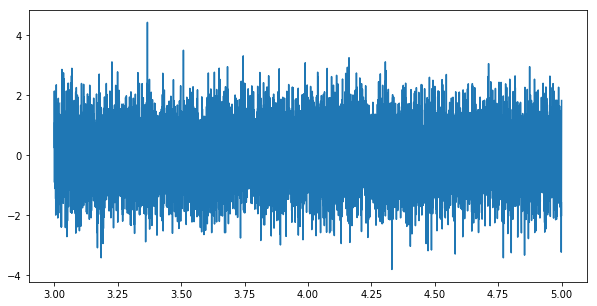

In [49]:
plt.figure(figsize = (10, 5)) # здесь задается размер рисуемой области
plt.plot(t, X)
plt.show()

####  6. Найти мат. ожидание данного ВР двумя способами: 
- Во-первых, с помощью функции M = np.mean(X) которая считает среднее значение ряда;
- Во-вторых, с помощью собственных расчетов на основе формулы (2.7) из лекции 2.

In [50]:
M = np.mean(X)
M

0.0030317886741499087

In [51]:
#2.7
np.sum(X)/len(X)

0.0030317886741499087

#### 7. Найти дисперсию (variance) данного ВР двумя способами: 
- С помощью функции D = np.var(X) которая считает дисперсию ряда; 
- С помощью собственных расчетов на основе формулы (2.8) из лекции 2.Сравнить полученные результаты расчетов.

In [52]:
D = np.var(X)
D

0.985938147066775

In [53]:
np.sum((X - M) ** 2 ) / len(X)

0.985938147066775

In [54]:
σ = np.sqrt(D)

#### 8. Найти асимметрию ВР по формуле (2.9). Найти в Python функцию, которая считает ту же самую характеристику, искать по ключевому слову Skewness. Сравнить полученные результаты расчетов.

In [55]:
from scipy.stats import skew
skew(X)

-0.016934792642040702

In [56]:
(np.sum((X-M)**3)/len(X))/σ**3

-0.0169347926420407

#### 9. Найти эксцесс ВР по формуле (2.10). Найти в Python функцию, которая считает ту же самую характеристику, искать по ключевому слову Kurtosis. Сравнить полученные результаты расчетов.

In [57]:
from scipy.stats import kurtosis
kurtosis(X) # fisher false

-0.06296584803905114

In [58]:
np.sum((X-M)**4)/len(X)/σ**4 - 3

-0.0629658480390507

####  10. Построить оценку выборочной автокорреляции ВР несколькими способами (до 20 лага) и построить ее на графике:
- С помощью функции plot_acf(X[0:20])
- На основе расчетов через функцию np.correlate(x, x, mode = 'full')
- С помощью собственных расчетов на основе формулы (2.17).
- Сравнить полученные результаты в отчете.

#### С помощью функции plot_acf(X[0:20])

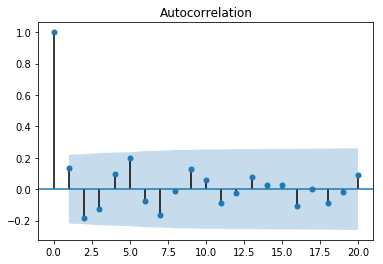

In [59]:
plot_acf(X[0:80], lags = 20) # в 4 раза больше
plt.show()

#### На основе расчетов через функцию np.correlate(x, x, mode = 'full')

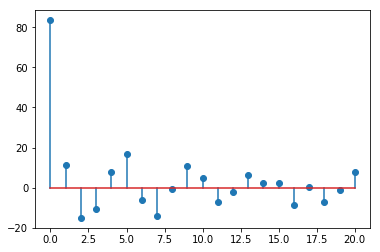

In [60]:
corr = np.correlate(X[:80], X[:80], mode = 2)
plt.stem(corr[79:100])
plt.show()

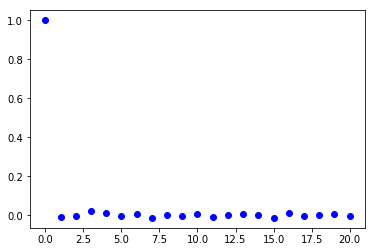

In [66]:

def np_correlate(x,lags):
    mean = x.mean()
    var = np.var(x)
    xp = x - mean
    corr = np.correlate(xp,xp,'full')[len(x)-1:]/var/len(x)
    return corr[:len(lags)]
plt.plot(np_correlate(X, range(0,21)), 'bo')
plt.show()


#### С помощью собственных расчетов на основе формулы (2.17).

In [61]:
def autocorr2_17(X):
    N = len(X)
    my_res = []

    for lag in range (0, 21):
        lagX = np.roll(X,lag)
        ch = (N-lag)*np.sum(X*lagX) - np.sum(X)*np.sum(lagX)
        zn = np.sqrt((N-lag)*np.sum(X**2) - np.sum(X)**2) * np.sqrt((N-lag)*np.sum(lagX**2) - np.sum(lagX)**2)
        my_res.append(ch/zn)
    return(my_res)

In [62]:
autocorr2_17(X)

[1.0000000000000002,
 -0.011188070895267105,
 -0.002277759811614951,
 0.022599223404077853,
 0.008746211071807588,
 -0.005133026197974941,
 0.006928075454288982,
 -0.014291904248551607,
 0.0026645005958765983,
 -0.0017091053781982128,
 0.008756292532715693,
 -0.008035135469259541,
 -0.0012384645120121576,
 0.003721552843128248,
 0.0010221320548034752,
 -0.012350471701762853,
 0.009936153319269003,
 -0.0036582411166638015,
 0.0010763168069215718,
 0.005891521719185477,
 -0.005377986090964457]

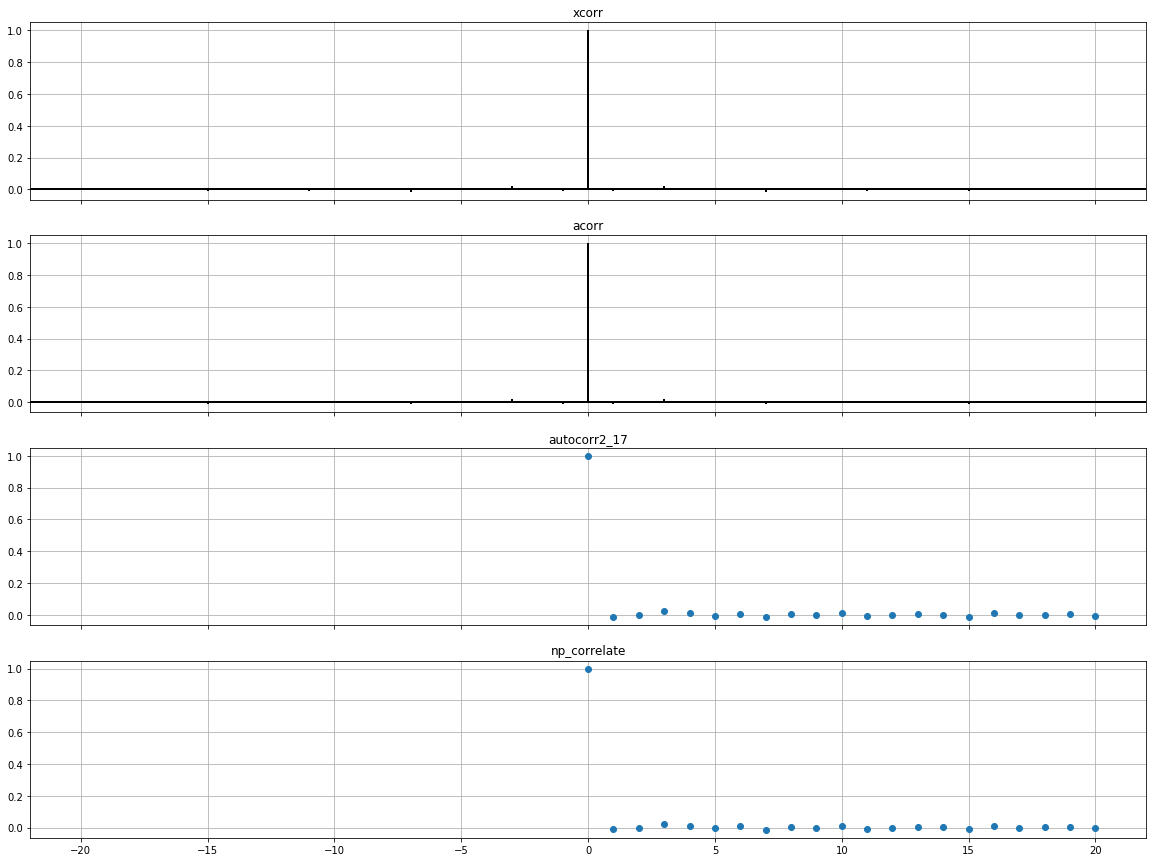

In [67]:
fig, [ax1, ax2, ax3, ax4] = plt.subplots(4, 1, sharex=True, figsize=(20,15))
ax1.xcorr(X, X, usevlines=True, maxlags=20, normed=True, lw=2)
ax1.grid(True)
ax1.axhline(0, color='black', lw=2)
ax1.set_title("xcorr")

ax2.acorr(X, usevlines=True, normed=True, maxlags=20, lw=2)
ax2.grid(True)
ax2.axhline(0, color='black', lw=2)
ax2.set_title("acorr")

ax3.plot(autocorr2_17(X), 'o')
ax3.set_title("autocorr2_17")
ax3.grid(True)

ax4.plot(np_correlate(X, range(0,21)), 'o')
ax4.set_title("np_correlate")
ax4.grid(True)

plt.show()

#### Pandas autocorrelation

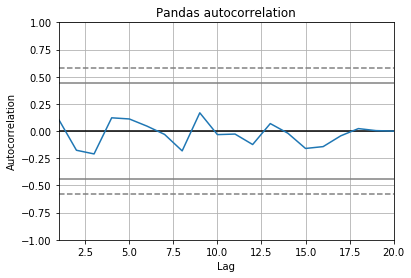

In [68]:
autocorrelation_plot(X[0:20])
plt.title("Pandas autocorrelation")
plt.show()

#### statsmodels PACF

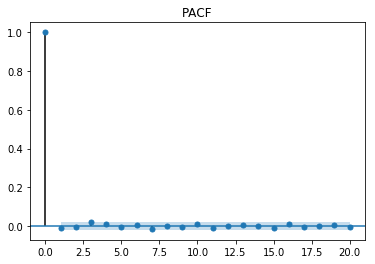

In [70]:
from statsmodels.graphics.tsaplots import plot_pacf
plot_pacf(X, lags=20)
plt.title("PACF")
plt.show()

#### 11. Написать полную функцию, которая имеет один входной параметр – это исходный временной ряд для анализа. Функция должна выполнять все вышеперечисленные перечисленные действия (кроме 1 пункта, конечно же) для того ВР, что был передан ей в качестве параметра. То есть вычислять мат. ожидание, дисперсию, асимметрию, эксцесс и строить АКФ.

In [76]:
def tS(ts):
    print("mean: ", np.mean(ts))
    print("variance: ", np.var(ts))
    print("skew: ", skew(ts))
    print("kurtosis: ", kurtosis(ts))
    plt.plot(ts)
    plt.show()
    plt.acorr(ts, usevlines=True, normed=True, maxlags=80, lw=2)
    plt.grid(True)
    plt.axhline(0, color='black', lw=2)
    plt.title("acorr")
    plt.show()

mean:  0.0030317886741499087
variance:  0.985938147066775
skew:  -0.016934792642040702
kurtosis:  -0.06296584803905114


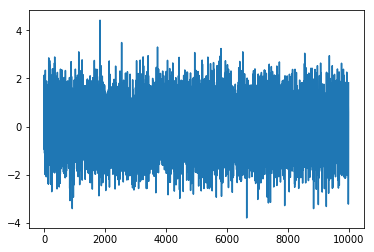

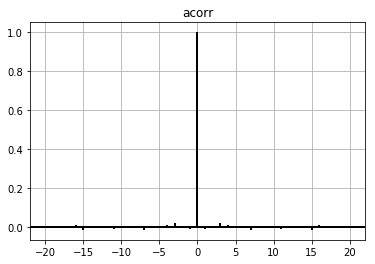

In [72]:
tS(X)

#### 12. Получить у преподавателя mat-файлы, содержащие массивы некоторых ВР, по вариантам. Номер варианта определяется по последним двум цифрам студенческого билета. `09`

#### 13. Загрузить из этих mat-файлов массив ВР. 

In [73]:
Xmat = h5py.File('9.mat', 'r')
Xmat = Xmat.get('z9')
Xmat = np.array(Xmat)
Xmat = np.reshape(Xmat, len(Xmat))

#### 14. Используйте уже написанную функцию (пункт 11) от этого ВР для того, чтобы получить все его базовые характеристики.

mean:  -0.17740255215157424
variance:  1.2916122063873654
skew:  0.19581805415438056
kurtosis:  -0.4802533106182225


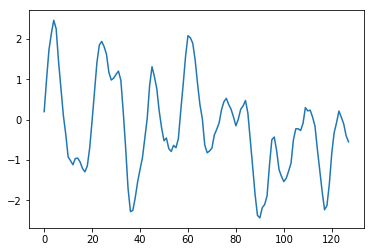

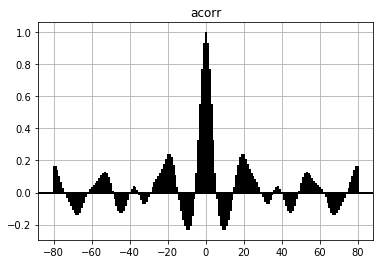

In [77]:
tS(Xmat)

#### 15. Пояснить, с чем могут быть связаны особенности поведения или значений тех или иных характеристик.

- Первый начальный момент (мат. ожидание) характеризует центр рассеяния данных. mean:  -0.17740255215157424
- Второй начальный момент (дисперчия) характеризует величину рассеяния данных. variance:  1.2916122063873654
- Третий центральный момент (асимметрия) характеризует несимметричность распределения случайной величины.
- Четвертый центральный момент (эксцесс) характеризует степень выраженности хвостов распределения:

In [75]:
3 * np.sqrt(np.var(Xmat)) ** 4 > kurtosis(Xmat) # эксцесс небольшой

True

- АКФ содержит периодическую составляющую - данные имеют тот же период
- Тренд покрывает наибольший процент дисперсии исходного ВР (лаг 1)
- Нет тенденции затухания по мере роста лага